<a href="https://colab.research.google.com/github/jcmachicao/deep_learning_2025_curso/blob/main/S02__CNN_demo_conv_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate a random 28x28 pixel 3-channel image using PyTorch, apply a 2D convolution to it using `torch.nn.functional.conv2d` with a defined kernel, explain the changes in dimensions due to the convolution, and visualize the original and resulting images to demonstrate the effect of the convolutional transformation.

## Generar una imagen aleatoria

### Subtask:
Crear una figura simple con dimensiones similares a 28x28 píxeles y 3 canales de color utilizando PyTorch.


**Reasoning**:
Import the torch library and generate a random tensor representing an image with the specified dimensions.



In [ ]:
import torch

random_image = torch.rand(1, 3, 28, 28)

## Crear un kernel convolucional

### Subtask:
Definir un kernel (filtro) para la operación de convolución.


**Reasoning**:
Define a 2D tensor in PyTorch that will serve as the convolutional kernel with compatible dimensions for a 3-channel input and an output channel dimension. Initialize the kernel with random values and ensure it is a float tensor.



In [ ]:
kernel = torch.randn(16, 3, 3, 3)
kernel = kernel.float()

## Aplicar la convolución

### Subtask:
Usar `torch.nn.functional.conv2d` para aplicar la convolución a la imagen generada con el kernel definido.


**Reasoning**:
Import the necessary functional module and apply the convolution to the generated image using the defined kernel.



In [ ]:
import torch.nn.functional as F

convolved_image = F.conv2d(random_image, kernel)

## Explicar las dimensiones y cambios

### Subtask:
Describir cómo cambian las dimensiones de la imagen después de la operación convolucional y explicar el rol de los parámetros como padding y stride.


**Reasoning**:
Print the shapes of the original and convolved images to observe the dimensional changes and then explain how padding and stride affect these changes.



**Imagen Original**:

`torch.Size([1, 3, 28, 28])`

**Convolved image shape**:

`torch.Size([1, 16, 26, 26])`
<br>
<br>
**Explanation of dimensional changes:**<br>
* The convolution operation changed the dimensions of the image.
* The number of output channels is determined by the `number of filters` in the kernel (16 in this case).
* Without padding and with a stride of 1 (default values), the spatial dimensions (height and width) are reduced.
* The reduction in spatial dimensions is calculated as:
* Output spatial dimension =

`(Input spatial dimension - Kernel spatial dimension + 2 * padding) / stride + 1`

* In this case, for height: (28 - 3 + 2 * 0) / 1 + 1 = 26
* And for width: (28 - 3 + 2 * 0) / 1 + 1 = 26
* Therefore, the output shape is (Batch size, Output channels, Output height, Output width) which is (1, 16, 26, 26).

**Role of padding and stride:**<br>
* Padding adds zeros around the input image, which helps to preserve the spatial dimensions of the output.
* Stride determines the step size of the kernel as it slides over the image. A larger stride reduces the spatial dimensions of the output.

## Mostrar resultados

### Subtask:
Visualizar la imagen original y la imagen resultante después de la convolución para ilustrar el efecto del kernel.


**Reasoning**:
Import necessary libraries and define the transformation to convert tensors to PIL images.



In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

to_pil_image = transforms.ToPILImage()

**Reasoning**:
Select the first channel of both the original and convolved images, remove the batch dimension, convert them to PIL images, and then create subplots to display and compare the original and convolved images.



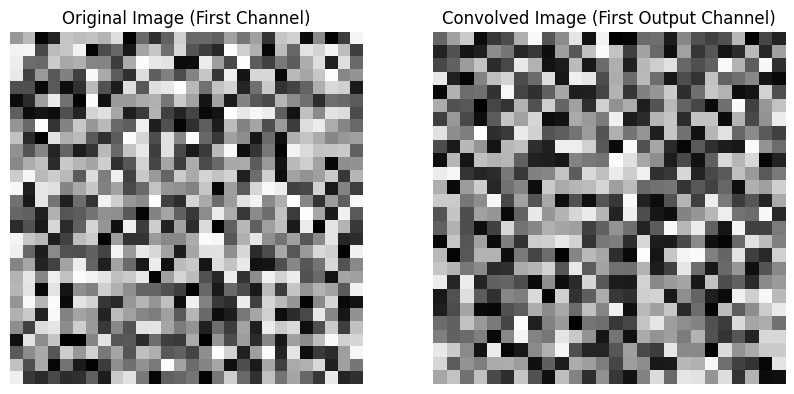

In [ ]:
original_image_pil = to_pil_image(random_image.squeeze(0)[0])
convolved_image_pil = to_pil_image(convolved_image.squeeze(0)[0])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original_image_pil, cmap='gray')
ax[0].set_title("Original Image (First Channel)")
ax[0].axis('off')

ax[1].imshow(convolved_image_pil, cmap='gray')
ax[1].set_title("Convolved Image (First Output Channel)")
ax[1].axis('off')

plt.show()

## Summary:

### Data Analysis Key Findings

*   The original random image had a shape of (1, 3, 28, 28), representing a single image with 3 color channels and dimensions of 28x28 pixels.
*   A convolutional kernel was defined with a shape of (16, 3, 3, 3), indicating 16 output filters, 3 input channels, and a 3x3 spatial size.
*   After applying the 2D convolution with default padding (0) and stride (1), the convolved image had a shape of (1, 16, 26, 26).
*   The number of output channels in the convolved image (16) is equal to the number of filters in the kernel.
*   The spatial dimensions (height and width) of the convolved image (26x26) were reduced compared to the original image (28x28) due to the 3x3 kernel size and lack of padding, following the formula: Output spatial dimension = (Input spatial dimension - Kernel spatial dimension + 2 \* padding) / stride + 1.
*   Padding adds zeros to preserve spatial dimensions, while stride affects the step size of the kernel and can reduce spatial dimensions.
*   Visualizing the first channel of the original image and the first output channel of the convolved image demonstrates the transformation applied by the convolution.

### Insights or Next Steps

*   Experiment with different kernel sizes, padding values, and strides to observe their effect on the output dimensions and the visual transformation of the image.
*   Explore applying multiple convolutional layers and pooling operations to build a simple convolutional neural network (CNN) for image feature extraction.


In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Define the path to your image file
image_path = '/content/cat_sample.jpg' # Replace with the actual path to your image

# Open the image using Pillow
try:
    img = Image.open(image_path)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    # You might want to handle this error more robustly, e.g., exit or use a default image
    exit()


# Define transformations
transform = transforms.Compose([
    transforms.Resize((28, 28)), # Resize to 28x28
    transforms.ToTensor(),       # Convert PIL image to PyTorch tensor
    # Ensure the image has 3 channels (handle grayscale or alpha channels)
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0) == 1 else x),
    transforms.Lambda(lambda x: x[:3, :, :]) # Keep only the first 3 channels if more exist
])

# Apply transformations
processed_image = transform(img)

# Add a batch dimension (required for conv2d)
processed_image = processed_image.unsqueeze(0)

print("Original image format:", img.format)
print("Original image size:", img.size)
print("Processed image shape:", processed_image.shape)

# Now you can use 'processed_image' with your kernel
convolved_external_image = F.conv2d(processed_image, kernel)
print("Convolved external image shape:", convolved_external_image.shape)

Original image format: JPEG
Original image size: (302, 223)
Processed image shape: torch.Size([1, 3, 28, 28])
Convolved external image shape: torch.Size([1, 16, 26, 26])


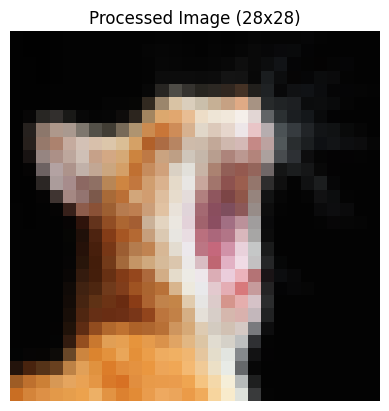

In [ ]:
# If you want to display the 3-channel image:
processed_image_display = processed_image.squeeze(0) # Remove batch dimension

# If you want to display a single channel (e.g., the first one) as a grayscale image:
# processed_image_display = processed_image.squeeze(0)[0] # Remove batch and select first channel

# Convert the tensor to a PIL image
to_pil_image = transforms.ToPILImage()
processed_image_pil = to_pil_image(processed_image_display)

# Display the image
plt.imshow(processed_image_pil)
plt.title("Processed Image (28x28)")
plt.axis('off') # Hide axes
plt.show()